<a href="https://colab.research.google.com/github/rajasreekalli/Data-Visualization/blob/main/R_M_Core.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns

In [34]:
df = pd.read_csv('/content/drive/MyDrive/Boston_Housing_from_Sklearn.csv')
df

,CRIM,NOX,RM,AGE,PTRATIO,LSTAT,PRICE
0,0.00632,0.538,6.575,65.2,15.3,4.98,24.0
1,0.02731,0.469,6.421,78.9,17.8,9.14,21.6
2,0.02729,0.469,7.185,61.1,17.8,4.03,34.7
3,0.03237,0.458,6.998,45.8,18.7,2.94,33.4
4,0.06905,0.458,7.147,54.2,18.7,5.33,36.2
...,...,...,...,...,...,...,...
501,0.06263,0.573,6.593,69.1,21.0,9.67,22.4
502,0.04527,0.573,6.120,76.7,21.0,9.08,20.6
503,0.06076,0.573,6.976,91.0,21.0,5.64,23.9
504,0.10959,0.573,6.794,89.3,21.0,6.48,22.0


In [35]:
df.dtypes

CRIM       float64
NOX        float64
RM         float64
AGE        float64
PTRATIO    float64
LSTAT      float64
PRICE      float64
dtype: object

In [36]:
# 1) Make a heatmap of the correlations.  Identify any features that have a correlation coefficient of magnitude 0.5 (could be + or -) or greater with price.   We will limit our analysis to these three features.
corr = df.corr()

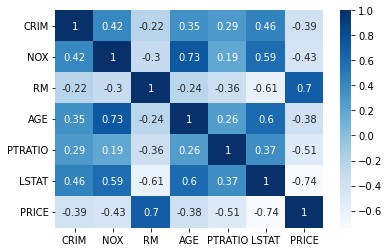

In [37]:
sns.heatmap(corr, cmap = 'Blues', annot = True);

In [38]:
# 2. Select columns for your feature matrix (X) and select PRICE for your target vector (y).
feature_names = ['RM', 'PTRATIO', 'LSTAT']
df.loc[:, feature_names]

,RM,PTRATIO,LSTAT
0,6.575,15.3,4.98
1,6.421,17.8,9.14
2,7.185,17.8,4.03
3,6.998,18.7,2.94
4,7.147,18.7,5.33
...,...,...,...
501,6.593,21.0,9.67
502,6.120,21.0,9.08
503,6.976,21.0,5.64
504,6.794,21.0,6.48


In [39]:
X = df.drop(columns=['PRICE', 'CRIM', 'NOX', 'AGE'])
y = df['PRICE']

In [40]:
X.shape

(506, 3)

In [41]:
y.shape

(506,)

In [42]:
# 3) Split your data into train and test groups. Please use random number 42 for consistency!
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [43]:
X.shape

(506, 3)

In [44]:
y.shape

(506,)

In [22]:
# 4) Instantiate your model and fit it on the training set
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [23]:
train_score = reg.score(X_train, y_train)
print(train_score)

0.6877966145058925


In [24]:
test_score = reg.score(X_test, y_test)
print(test_score)

0.6331590458194678


In [26]:
# 5) Evaluate your model performance using R^2 on the training set and on the test set.  Is there a difference between model performance on the training data vs the test data?
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [46]:
preds = reg.predict(X_test)

In [28]:
test_score = reg.score(X_test, y_test)
print(test_score)

0.6331590458194678


In [58]:
# 5) Evaluate your model performance using R^2 on the training set and on the test set.  Is there a difference between model performance on the training data vs the test data?
r2_score(y_test, preds)

0.6331590458194678

In [59]:
train_score = reg.score(X_train, y_train)
print(train_score)

0.6877966145058925


In [60]:
# 6) Evaluate your model using mean absolute error (MAE).  
mean_absolute_error(y_test, preds)

3.3918448293813976

In [55]:
# 7) Evaluate your model using mean squared error (MSE).  
mean_squared_error(y_test, preds)

25.688824196675956

In [61]:
# 8) Evaluate your model performance using RMSE on the training set and on the test set. This metric is useful because the units will be in the same units as your target vector. In this case 1,000 of dollars.  
np.sqrt(mean_squared_error(y_test, preds))

5.068414367104959